# Sleep and Academic Performance: An Analytical Study

(COGS 108 Final Project)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Names

- Jin Lee
- Katrina Leanne Aguedan
- Luis Pina
- Shashank Thattai
- Vincent Tu

# Abstract


---

This analytical study examines the relationship between sleep patterns and academic performance among college students. Recognizing sleep as a critical component of health and cognitive function, the research aims to quantify the impact of various sleep-related factors, including duration, quality, and consistency, on students' academic achievements. A cross-sectional analysis of self-reported sleep habits and academic records from a diverse sample population provides the basis for this investigation. The study also explores the role of modern technology and social pressures in shaping sleep routines. Preliminary findings suggest a significant correlation between sufficient, high-quality sleep and higher academic performance, underscoring the importance of sleep education and policy reforms aimed at optimizing student health and learning outcomes. The implications of these findings are discussed in relation to current sleep guidelines and educational practices.

# Research Question

How do sleep patterns, including factors such as duration, quality, and consistency impact college students' academic performance? Which factors, if any, are more impactful?

## Background and Prior Work

Sleep plays a crucial role in cognitive function, emotional well-being, and overall health. In this data science project, we aim to investigate how various dimensions of sleep patterns, including factors such as quality, duration, and consistency impact college students' academic performance.

Sleep patterns comprises a range of variables, including the duration of sleep, the quality of sleep, the timing of sleep phases (such as rapid eye movement (REM) sleep and non-REM sleep), the sleep environment, and the regularity of sleep schedules. These factors can significantly influence an individual's cognitive abilities, mood regulation, and stress resilience, all of which are vital for academic success.

For college students who  keep irregular schedules, academic pressures, and lifestyle factors that may disrupt sleep patterns, understanding the impact of sleep on academic performance and stress levels could help college students relieve stress and perform better academically. By analyzing large datasets comprising sleep data, academic records, and self-reported stress levels,we plan to discover patterns and correlations that show how sleep and academic outcomes among college students are tied together and changed through different factors.

Some work that has been done is work that shows how a singular factor of sleep or the duration of sleep affects academic performance<sup><a href="#fn1" id="ref1">1</a></sup>. There was no relation between sleep measures on the single night before a test and test performance; instead, sleep duration and quality for the month and the week before a test correlated with better grades<sup><a href="#fn2" id="ref2">2</a></sup>.

<br>

<sup id="fn1">1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7381801/<a href="#ref1" title="Jump back to footnote 1 in the text.">↩</a></sup>

<sup id="fn2">2. https://www.nature.com/articles/s41539-019-0055-z<a href="#ref2" title="Jump back to footnote 2 in the text.">↩</a></sup>

# Hypothesis


College students who consistently achieve 7+ hours of high-quality sleep will achieve higher academic performance (as measured by GPA) compared to students with inconsistent sleep patterns of fewer than 6 hours of low-quality sleep per night.

# Data

## Data overview

- **Dataset #1:**
  - Dataset Name: StudentLife 
  - Link to the dataset: https://studentlife.cs.dartmouth.edu/
  - Number of observations: 30 (after cleaning)
  - Number of variables: 6

  
- **Dataset #2:**
  - Dataset Name: CSE Student Performances
  - Link to the dataset: https://www.kaggle.com/datasets/mdismielhossenabir/psychosocial-dimensions-of-student-life
  - Number of observations: 99
  - Number of variables: 10

<!-- Now write 2 - 5 sentences describing each dataset here. Include a short description of the important variables in the dataset; what the metrics and datatypes are, what concepts they may be proxies for.
 -->
 
<br>

**Data Summary**

The *StudentLife dataset* is apart of a study on 48 Dartmouth students over 10 weeks tracking their mental health, academic performance and behavioral trends. The key variables we will be utilizing from this dataset for the gpa and sleep duration variables that were recorded during this study. The datatypes in this set are floats and strings. The concepts that this data set may be proxies for in our thesis statement is the cumulative gpa values associated with avg amount of hours of sleep per night data.

The *CSE Student Performances* dataset is comprised of data from 100 computer science students tracking their class performance, their note taking tendencies, mental health status, the number of friends they have, sleep, and preferences for presentations and new things. The main variables we will be looking at is sleep hours which is given as an integer and class performance which is given as a categorical label (Excellent, Average, etc.). These data will be our proxies for academic performance and sleep duration.


<br>

**Data Cleaning Strategy**

As a whole, the StudentLife Dataset is very large (5 GB) and the majority of the data collected did not concern this project.

Taking a closer look, it was apparent that the data we wanted to look at (GPA, sleep) were not already grouped together within the same table. Luckily, the GPA data found in `grades.csv` were already in tidy data format. However, we saw that there were missing data since not all students had input their GPAs. Therefore, we must extract sleep data from only the students who filled out the GPA information.

The data for sleep were in different `.json` files separated by student and the number of sleep logs completed was not consistent for each student. Thus, we will average the sleep data per student.

Additionally, we found that the 'hours' column within each sleep file was the *response's option number* rather than the *actual hours slept*, so we will need to convert it using the response definitions provided within the StudentLife Dataset.

Finally, we will need to join the two sets of data together so that each observation represents a single student and the columns are the GPAs, average sleep length, consistency of sleep length, and average rating of sleep.

The resulting dataframe was smaller than we wanted so we merged it with the *CSE Student Performances* data.

## StudentLife Dataset

Since the StudentLife Dataset measures a large amount of variables and data not relevant to our analysis, we extracted only the files pertaining to grades and sleep.

Furthermore, in the grades.csv file, we noticed that not every student in the study had opted to share their GPA, and since knowing the GPAs were necessary, we only manually picked data for those students who had shared their GPA. Because of this, the pool of about 60 students has dwindled to about half.

We felt that it was useful to convert the sleep data from JSON to CSV files (using https://data.page/json/csv) to tidy the data.

### Importing the Data

In [1]:
# IMPORTING LIBRARIES
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 7)

# import pandas & numpy library
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

In [2]:
# LOADING GRADES
studentlife = pd.read_csv('data/grades.csv')
studentlife.head()

,uid,gpa all,gpa 13s,cs 65
0,u01,2.863,1.777778,3.0
1,u02,3.505,4.000000,4.0
2,u04,3.029,3.500000,4.0
3,u05,3.679,3.777778,4.0
4,u07,3.474,4.000000,4.0


#### Columns:
- **uid:** Unique identifier for each student.
- **gpa:** Cumulative GPA.
- **gpa 13s:** Spring 2013 GPA.
- **cs 65:** GPA in COSC 065 (Smartphone Programming at Dartmouth College)

These column names will be renamed at the end of the data cleaning to be more descriptive.

In [3]:
# LOADING SLEEP

# Put uid's in a list
uids = studentlife['uid']

# Make a new dataframe for each student's sleep data
for uid in uids:
    # Create new name for df automatically
    new_df_name = f'sleep_{uid}'
    
    # Make new dataframes automatically
    exec(f"{new_df_name} = pd.read_csv(f'data/Sleep_{uid}.csv')")
    

sleep_u01.head(6) # Sample sleep data from student u01

,hour,location,rate,null,resp_time,social
0,NaN,NaN,NaN,8,1364118413,NaN
1,NaN,NaN,NaN,2,1364120311,NaN
2,NaN,NaN,NaN,"43.70639796,-72.28700878",1364121002,NaN
3,NaN,NaN,NaN,9,1364119576,NaN
4,NaN,NaN,NaN,"43.70639796,-72.28700878",1364122091,NaN
5,6.0,"43.70517864,-72.29310913",2.0,NaN,1365011632,3.0


### Cleaning

At this point, each student's sleep data is in its own DataFrame. But there is still some cleaning and reformatting to be done.

- We must remove any rows in which the hour is "NaN" since it provides no data for the duration of sleep.
- We will remove the column titled "null" since nearly all the observations are "NaN" and it is unclear what this column even measures.
- We will remove location data for privacy reasons and response time and social columns for irrelevance.

In [4]:
# CLEANING

# Get list of all sleep dataframes
all_sleep = %who_ls DataFrame
all_sleep.remove('studentlife') # Remove grades since it's not a sleep dataframe

# Perform cleaning by iterating through each sleep dataframe
for sleep_df in all_sleep:
    exec(f"{sleep_df} = {sleep_df}[['hour', 'rate']]") # Keep only the 'hour' and 'rate' columns
    exec(f"{sleep_df} = {sleep_df}.dropna()") # Keep only the rows where both the 'hour' and 'rate' are answered
    
sleep_u01.head() # View cleaned sample

,hour,rate
5,6.0,2.0
6,7.0,2.0
7,7.0,2.0
8,7.0,2.0
9,10.0,1.0


#### Interpreting Answer Values

The next issue is decoding the data to better represent the actual hours each student slept for and how they rated it. We are doing this because the numbers under 'hour' are not the actual hours the student slept for. According to the StudentLife Datasets's definitions, the sleep hour responses are coded like so:


| 'hour' Answer | Hours Slept |
| :----------- | :------------- |
| 1 | Less than 3 |
| 2 | 3.5 |
| 3 | 4 |
| 4 | 4.5 |
| 5 | 5 |
| 6 | 5.5 |
| 7 | 6 |
| 8 | 6.5 |
| 9 | 7 |
| 10 | 7.5 |
| 11 | 8 |
| 12 | 8.5 |
| 13 | 9 |
| 14 | 9.5 |
| 15 | 10 |
| 16 | 10.5 |
| 17 | 11 |
| 18 | 11.5 |
| 19 | 12 |

| 'rate' Answer | Meaning |
| :- | :- |
| 1 | Very good |
| 2 | Fairly good |
| 3 | Fairly bad |
| 4 | Very bad |

The answer "Less than 3 hours" is vague, so we are deciding to numerically represent it as 1.5 hours of sleep.

In [5]:
# CONVERTING DATA HELPER FUNCTION

# Function for converting sleep hour answers
def convert_hour(response):
    if response == 1:
        return 1.5
    elif response == 2:
        return 3.5
    elif response == 3:
        return 4
    elif response == 4:
        return 4.5
    elif response == 5:
        return 5
    elif response == 6:
        return 5.5
    elif response == 7:
        return 6
    elif response == 8:
        return 6.5
    elif response == 9:
        return 7
    elif response == 10:
        return 7.5
    elif response == 11:
        return 8
    elif response == 12:
        return 8.5
    elif response == 13:
        return 9
    elif response == 14:
        return 9.5
    elif response == 15:
        return 10
    elif response == 16:
        return 10.5
    elif response == 17:
        return 11
    elif response == 18:
        return 11.5
    elif response == 19:
        return 12

In [6]:
# CONVERT ACTUAL SLEEP HOURS

for sleep_df in all_sleep:
    exec(f"{sleep_df}['hour'] = {sleep_df}['hour'].apply(convert_hour)")

<br>

#### Merging StudentLife Sleep and GPA Data

The next challenge is consolidating the sleep data so that we can compare it alongside the GPA data. An issue we noticed was that the amount of valid sleep logs students completed varied across the board. For example, some students would only have about 20 valid logs and others over 70 valid logs. Due to this, we are choosing to average the amount of sleep recorded and the ratings of sleep for each student.

Another metric we will gather is the consistency of sleep duration quantified by the standard deviation of the length of sleep.

In [7]:
# Get Average of Sleep hours for each student
avg_sleep = []
for sleep_df in all_sleep:
    exec(f"avg_sleep.append({sleep_df}['hour'].mean())")
    
    
# Calculate StDev of sleep hours for each student
stdev_sleep = []
for sleep_df in all_sleep:
    exec(f"stdev_sleep.append(np.std({sleep_df}['hour']))")

In [8]:
# Get average rating of sleep and round to the nearest integer
avg_rate = []
for sleep_df in all_sleep:
    exec(f"avg_rate.append({sleep_df}['rate'].mean())")
    
avg_rate = np.round(avg_rate)

In [9]:
# Append new columns to grades dataframe
studentlife = studentlife.assign(sleep_avg=avg_sleep)
studentlife = studentlife.assign(sleep_stdev=stdev_sleep)
studentlife = studentlife.assign(sleep_rate_avg=avg_rate)

In [10]:
# Function for converting sleep ratings
def convert_rate(response):
    if response == 1:
        return 'Very good'
    if response == 2:
        return 'Fairly good'
    if response == 3:
        return 'Very bad'
    if response == 4:
        return 'Very bad'
    
studentlife['sleep_rate_avg'] = studentlife['sleep_rate_avg'].apply(convert_rate)

In [11]:
# Renaming columns
studentlife.columns = ['uid', 'cumulative_gpa', 'term_gpa', 'class_gpa', 'sleep_avg_hrs', 'sleep_stdev_hrs', 'sleep_rate_avg']
studentlife_numericgpa = studentlife.copy()
studentlife.head() # Now tidied data!

,uid,cumulative_gpa,term_gpa,class_gpa,sleep_avg_hrs,sleep_stdev_hrs,sleep_rate_avg
0,u01,2.863,1.777778,3.0,6.111111,0.598352,Fairly good
1,u02,3.505,4.000000,4.0,6.461538,0.553365,Fairly good
2,u04,3.029,3.500000,4.0,5.735294,0.424183,Fairly good
3,u05,3.679,3.777778,4.0,6.250000,0.629153,Fairly good
4,u07,3.474,4.000000,4.0,6.020833,0.529921,Fairly good


Unfortunately, there were a limited amount of data points from the StudentLife dataset after cleaning and pre-processing, so at this point, we decided to use another dataset with similar variables in order to have more data to work with.

## CSE Student Performances Dataset

This dataset required relatively less pre-processing and cleaning than the StudentLife dataset since all the observations and variables we needed were already in the same .csv file and since all the responses had already been standardized.

### Importing the Data

In [12]:
# Import CSE Student Performances Dataset
cse_students = pd.read_csv('data/CSE_student_performances.csv')

In [13]:
cse_students.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes


### Cleaning

The columns that we will keep are Academic Performance and Sleep Per Day Hours. While there are a number of other interesting metrics included in the dataset that could influence Academic Performance, we will stick to the scope of this data science project which is sleep and academic performance.

In [14]:
# Drop columns we don't need in cse_students dataframe
cse_students = cse_students[['AcademicPerformance', 'SleepPerDayHours']]
cse_students.head()

,AcademicPerformance,SleepPerDayHours
0,Average,12
1,Excellent,8
2,Average,8
3,Good,5
4,Average,5


In [15]:
cse_students['AcademicPerformance'].value_counts()

AcademicPerformance
Average          45
Good             41
Excellent         9
Below average     4
Name: count, dtype: int64

In [16]:
studentlife['cumulative_gpa'].value_counts().head()

cumulative_gpa
3.474    2
2.815    2
2.863    1
2.987    1
3.389    1
Name: count, dtype: int64

### Oh no! Both Datasets Measure Academic Performance Differently

The *StudentLife* dataset and the *CSE Students* dataset have different ways of documenting a students' performance. Specifically, *StudentLife* uses numerical data such as GPA (ex. 3.474) while *CSE Students* uses categorical data (ex. "Excellent").

In order to be able to use the datasets alongside each other, we had to convert one response type to the other. The *StudentLife* dataset was based on students in Dartmouth, so we used their grading scale and keywords to convert the StudentLife dataset's numerical GPAs to descriptive labels.

**Dartmouth Grading Scale:** https://www.dartmouth.edu/reg/transcript/grade_descriptions.html

In [17]:
# Function to convert GPA to Descriptive Label
def gpa_convert(gpa):
    if gpa >= 3.6667:
        return 'Excellent'
    elif gpa < 3.6667 and gpa >= 2.6667:
        return 'Good'
    elif gpa < 2.6667 and gpa >= 1.6667:
        return 'Average'
    else:
        return 'Below average'

In [18]:
# Convert GPAs in studentlife
studentlife['cumulative_gpa'] = studentlife['cumulative_gpa'].apply(gpa_convert)
studentlife['term_gpa'] = studentlife['term_gpa'].apply(gpa_convert)
studentlife['class_gpa'] = studentlife['class_gpa'].apply(gpa_convert)

In [19]:
studentlife.head()

,uid,cumulative_gpa,term_gpa,class_gpa,sleep_avg_hrs,sleep_stdev_hrs,sleep_rate_avg
0,u01,Good,Average,Good,6.111111,0.598352,Fairly good
1,u02,Good,Excellent,Excellent,6.461538,0.553365,Fairly good
2,u04,Good,Good,Excellent,5.735294,0.424183,Fairly good
3,u05,Excellent,Excellent,Excellent,6.250000,0.629153,Fairly good
4,u07,Good,Excellent,Excellent,6.020833,0.529921,Fairly good


Note that since **`studentlife`** had multiple types of academic performance listed (cumulative, term, class), we needed to pick only one so that it could be the proper shape to be combined. Though, these additional GPAs could be worth looking into later on.

The **`cse_students`** dataset measured the class performance of each student. For this reason, `class_gpa` from **`studentlife`** makes the most sense to use since it is the same variable being observed.

Since **`cse_students`** does not have data on the consistency of the sleep or rating of the sleep, we will omit that in the combined data set where we will measure academic performance against hours slept.

Now we can combine the two dataframes into one called `sleep_and_school`.

In [20]:
# Renaming columns in cse_students before merging
cse_students.columns = ['class_gpa', 'sleep_avg_hrs']
sleep_and_school = pd.concat([studentlife[['class_gpa', 'sleep_avg_hrs']], cse_students])
sleep_and_school = sleep_and_school.reset_index().drop(axis=1, labels=['index'])
sleep_and_school

,class_gpa,sleep_avg_hrs
0,Good,6.111111
1,Excellent,6.461538
2,Excellent,5.735294
3,Excellent,6.250000
4,Excellent,6.020833
...,...,...
124,Good,6.000000
125,Good,6.000000
126,Good,4.000000
127,Good,10.000000


In [21]:
sleep_and_school['class_gpa'].value_counts()

class_gpa
Good             51
Average          46
Excellent        27
Below average     5
Name: count, dtype: int64

<br>
<br>

# Results

## Exploratory Data Analysis

<!-- Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context. -->
In order to accurately assess the correlation between a student's sleep duration and their academic performance, it's crucial that we visualize the results for effective exploratory analysis. We will examine data from both the **`Sleep_and_school`** and **`studentLife`** datasets. Our analysis will focus on the relationship between sleep duration and GPA obtained in their respective classes. Additionally, we will rely on the **`studentLife`** dataset to investigate how other sleep-related factors, such as sleep quality and consistency, impact students' academic achievements positively.

Prior to diving into our analysis of data, here is a refresher on what gpas fall under the categories of 'Excellent', 'Good', 'Average' & 'Below average'.

| Category | GPA Threshold |
| :----------- | :------------- |
| Excellent | GPA $\geq$ 3.6667 |
| Good |2.6667 $\leq$ GPA $\lt$ 3.6667 |
| Average | 1.6667 $\leq$ GPA $\lt$ 2.6667 |
| Below Average | GPA $\lt$ 1.6667 |

## Analysis 1: Impact of Sleep Duration on Academic Performance

In this section, we will examine the academic achievement achieved in correlation with the sleep duration of students sourced from our **`sleep_and_school`** dataframe. This dataset is derived from the "cse_students" and "studentlife" cleaned datasets, utilizing variables such as `class_gpa` and `sleep_avg_hrs`.

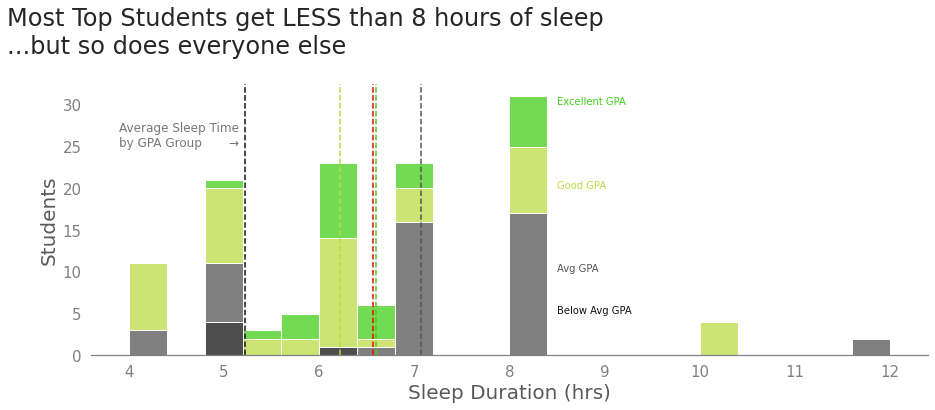

In [22]:
# PLOT
# Aesthetics
plt.figure(figsize=(15, 5))
grade_palette = ['#44ce1b', '#bbdb44', '#555', '#111']
ax = plt.axes()

# Histogram
sns.histplot(data=sleep_and_school, x='sleep_avg_hrs', hue='class_gpa', multiple='stack', bins=20, palette=grade_palette, hue_order=['Excellent', 'Good', 'Average', 'Below average'])

# Aesthetics
plt.xlabel('Sleep Duration (hrs)', color='#595959', size=20)
plt.ylabel('Students', color='#595959', size=20)
sns.despine(left=True)
ax.spines[['bottom', 'left']].set_color('gray')
ax.tick_params(colors='gray', which='both', labelsize=15)
ax.set_title(f'Most Top Students get LESS than 8 hours of sleep\n...but so does everyone else', ha='left', x=-0.1, pad=30, fontsize='medium')
ax.get_legend().remove()

# Annotations
plt.annotate('Excellent GPA', xy=(8.5,30), size=10, color='#44ce1b')
plt.annotate('Good GPA', xy=(8.5,20), size=10, color='#bbdb44')
plt.annotate('Avg GPA', xy=(8.5,10), size=10, color='#555')
plt.annotate('Below Avg GPA', xy=(8.5,5), size=10, color='#111')
plt.axvline(sleep_and_school[sleep_and_school['class_gpa'] == 'Excellent']['sleep_avg_hrs'].mean(), color='#44ce1b', linestyle='--')
plt.axvline(sleep_and_school[sleep_and_school['class_gpa'] == 'Good']['sleep_avg_hrs'].mean(), color='#bbdb44', linestyle='--')
plt.axvline(sleep_and_school[sleep_and_school['class_gpa'] == 'Average']['sleep_avg_hrs'].mean(), color='#555', linestyle='--')
plt.axvline(sleep_and_school[sleep_and_school['class_gpa'] == 'Below average']['sleep_avg_hrs'].mean(), color='#111', linestyle='--')
plt.axvline(sleep_and_school['sleep_avg_hrs'].mean(), color='red', linestyle='--')
plt.annotate('Average Sleep Time\nby GPA Group       →', xy=(3.9,25), size=12, color='#777')
                              
plt.show()

The red dashed line shows the overall average, and every other dashed line is associated with its color group.

This graph shows that on average, the people with Excellent and Good GPAs get 6-7 hours of sleep. We can infer that these people are in a certain spot where they are sacrificing or prioritizing other things over sleep and it still leads them to the best GPA because there are people getting less and more sleep but this area gets the best GPA.

## Analysis 2: Impact of Sleep Duration Consistency on Academic Performance

Earlier, we created a column in **`studentlife`** that took the standard deviation of the duration of students' sleep and now we will see if there is any correlation between a lower standard deviation of sleep duration (so higher consistency) and better academic performance. We kept a copy of **`studentlife`** with its numeric values, pre-conversion, in **`studentlife_numericgpa`**.

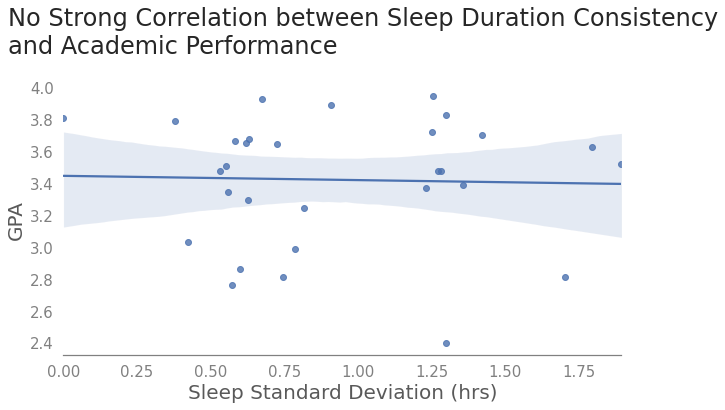

In [23]:
# PLOT
plt.figure(figsize=(10, 5))
ax = plt.axes()

sns.regplot(data=studentlife_numericgpa, x='sleep_stdev_hrs', y='cumulative_gpa')

# Aesthetics
plt.xlabel('Sleep Standard Deviation (hrs)', color='#595959', size=20)
plt.ylabel('GPA', color='#595959', size=20)
sns.despine(left=True)
ax.spines[['bottom', 'left']].set_color('gray')
ax.tick_params(colors='gray', which='both', labelsize=15)
ax.set_title(f'No Strong Correlation between Sleep Duration Consistency\nand Academic Performance', ha='left', x=-0.1, pad=30, fontsize='medium')

plt.show()

Based on the graph, we can conclude that there is no noticeable relationship between a high GPA and the consistent number of hours a student sleeps. We can interpet this from viewing the all the standard deviation plots are scattered. We are also able to draw that the possibility that students with inconsistent sleep patterns are much capable of achieving grades exceeding a 3.4 GPA.

#### OLS Regression

In [24]:
# Linear Regression
outcome, predictors = patsy.dmatrices('cumulative_gpa ~ sleep_stdev_hrs', studentlife_numericgpa)
model = sm.OLS(outcome, predictors)
res_log = model.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:         cumulative_gpa   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                   0.02698
Date:                Thu, 21 Mar 2024   Prob (F-statistic):              0.871
Time:                        04:31:04   Log-Likelihood:                -14.388
No. Observations:                  30   AIC:                             32.78
Df Residuals:                      28   BIC:                             35.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.4463      0.168     

From the Ordinary Least Squares (OLS) Regression analysis, we observed a p-value of 0.871. This high p-value indicates a high probability that the results we obtained occurred purely by chance. Consequently, this elucidates why, in the line graph depicted above, we perceive scattered points with no discernible relationship between sleep consistency and academic performance.

## Analysis 3: Impact of Sleep Quality on Academic Performance

In this section, we will take a look at the impact of sleep quality on academic performance through the **`studentlife`** dataset through the `gpa` variables and `sleep_rate_avg`.

In [25]:
studentlife.head()

,uid,cumulative_gpa,term_gpa,class_gpa,sleep_avg_hrs,sleep_stdev_hrs,sleep_rate_avg
0,u01,Good,Average,Good,6.111111,0.598352,Fairly good
1,u02,Good,Excellent,Excellent,6.461538,0.553365,Fairly good
2,u04,Good,Good,Excellent,5.735294,0.424183,Fairly good
3,u05,Excellent,Excellent,Excellent,6.250000,0.629153,Fairly good
4,u07,Good,Excellent,Excellent,6.020833,0.529921,Fairly good


### Class GPA and Sleep Quality

In this part, we look at the distribution of students by their sleep quality and class GPA.

In [26]:
# Proportions of Sleep Quality Rating and Class GPA
class_and_sleepqual = studentlife[['class_gpa', 'sleep_rate_avg']].value_counts().reset_index()
class_and_sleepqual = class_and_sleepqual.assign(prop=class_and_sleepqual['count'].mul(100/30))

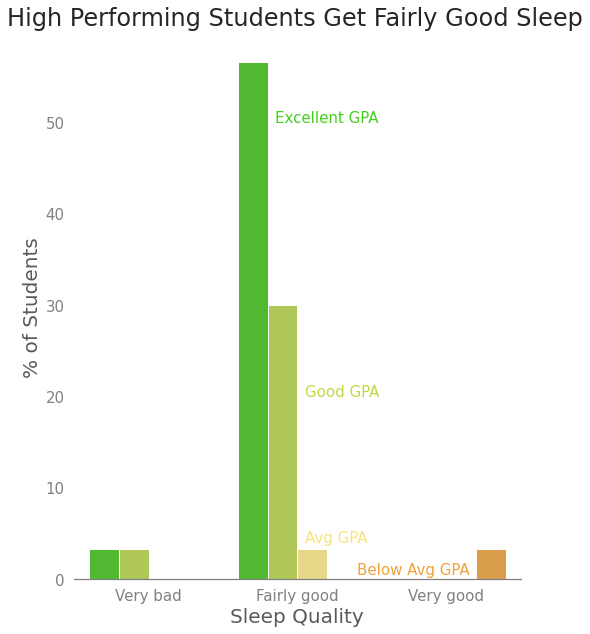

In [27]:
# PLOT
# Aesthetics
plt.figure(figsize=(8,10))
grade_palette = ['#44ce1b', '#bbdb44', '#f7e379', '#f2a134']
ax = plt.axes()

# Plot
sns.barplot(data=class_and_sleepqual,y='prop',x='sleep_rate_avg',hue='class_gpa',order=['Very bad', 'Fairly good', 'Very good'],palette=grade_palette)

# Aesthetics
plt.xlabel('Sleep Quality', color='#595959', size=20)
plt.ylabel('% of Students', color='#595959', size=20)
sns.despine(left=True)
ax.spines[['bottom', 'left']].set_color('gray')
ax.tick_params(colors='gray', which='both', labelsize=15)
ax.set_title(f'High Performing Students Get Fairly Good Sleep',ha='left',x=-0.15,pad=10,fontsize='medium')
ax.get_legend().remove()

# Annotations
plt.annotate('Excellent GPA', xy=(0.85,50), size=15, color='#44ce1b')
plt.annotate('Good GPA', xy=(1.05,20), size=15, color='#bbdb44')
plt.annotate('Avg GPA', xy=(1.05,4), size=15, color='#f7e379')
plt.annotate('Below Avg GPA', xy=(1.4,0.5), size=15, color='#f2a134')

plt.show()

This visualization shows us that **most students with excellent or good GPAs get fairly good quality sleep**. Of course there are interesting exceptions to this observation: some students report very bad sleep quality and still perform well while others can report very good quality sleep and still perform below average.

### Term GPA and Sleep Quality

Here, we look at how sleep quality impacts term GPA.

In [28]:
# Proportions of Sleep Quality Rating and Term GPA
term_and_sleepqual = studentlife[['term_gpa', 'sleep_rate_avg']].value_counts().reset_index()
term_and_sleepqual = term_and_sleepqual.assign(prop=term_and_sleepqual['count'].mul(100/30))

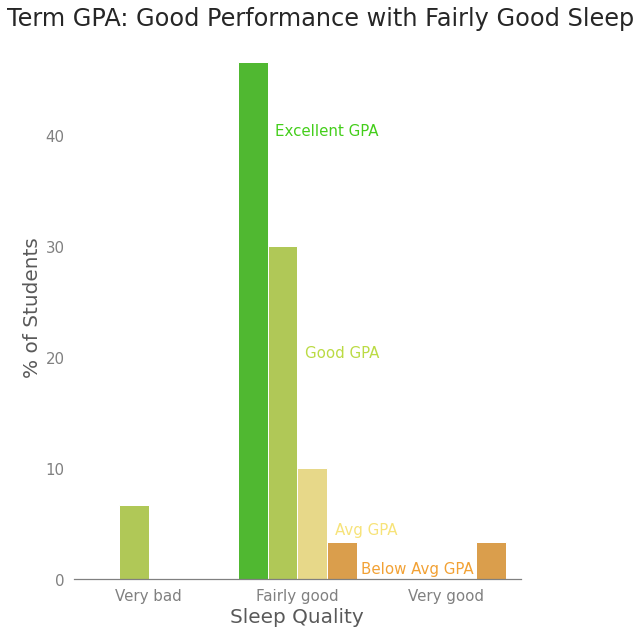

In [29]:
# PLOT
# Aesthetics
grade_palette = ['#44ce1b', '#bbdb44', '#f7e379', '#f2a134']
plt.figure(figsize=(8,10))
ax = plt.axes()

# Plot
sns.barplot(data=term_and_sleepqual,y='prop', x='sleep_rate_avg', hue='term_gpa',order=['Very bad', 'Fairly good', 'Very good'],palette=grade_palette)

# Aesthetics
plt.xlabel('Sleep Quality', color='#595959', size=20)
plt.ylabel('% of Students', color='#595959', size=20)
sns.despine(left=True)
ax.spines[['bottom', 'left']].set_color('gray')
ax.tick_params(colors='gray', which='both', labelsize=15)
ax.set_title(f'Term GPA: Good Performance with Fairly Good Sleep',ha='left',x=-0.15,pad=10,fontsize='medium')
ax.get_legend().remove()

# Annotations
plt.annotate('Excellent GPA', xy=(0.85,40), size=15, color='#44ce1b')
plt.annotate('Good GPA', xy=(1.05,20), size=15, color='#bbdb44')
plt.annotate('Avg GPA', xy=(1.25,4), size=15, color='#f7e379')
plt.annotate('Below Avg GPA', xy=(1.43,0.5), size=15, color='#f2a134')

plt.show()

In this plot as well, **most students with excellent or good GPAs get fairly good quality sleep**. Something that differs from the last plot is that we are seeing more students with Good, Average, and Below Average GPAs. This could indicate that even if a student performed well in in the CS65 class, they could have performed worse in the other classes during the same term. There may be different reasons for this as well: students prioritizing one class over another, stricter or looser grading of different professors, or simply struggling more in other classes.

Now to extend this, the next analysis is less founded since we do not have the students' sleep data for the entire academic career. However, it is still interesting to look at if we assume that each students' sleep habits have been consistent.

### Cumulative GPA and Sleep Quality

In [30]:
# Proportions of Sleep Quality Rating and Cumulative GPA
cumul_and_sleepqual = studentlife[['cumulative_gpa', 'sleep_rate_avg']].value_counts().reset_index()
cumul_and_sleepqual = cumul_and_sleepqual.assign(prop=cumul_and_sleepqual['count'].mul(100/30))

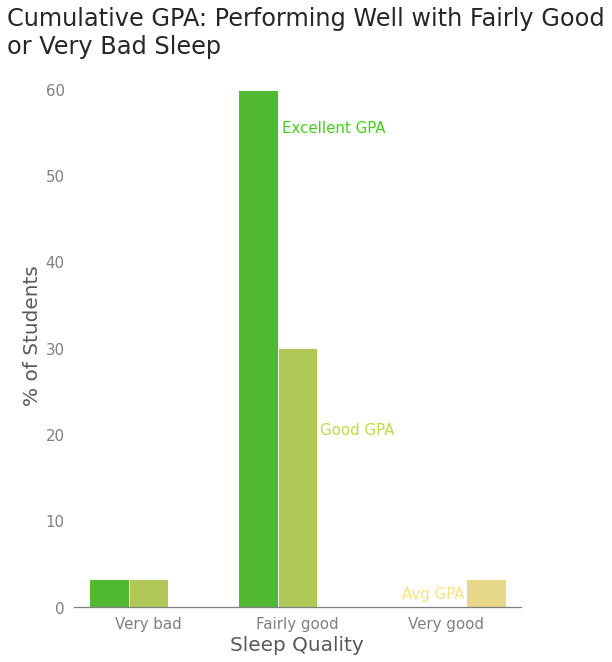

In [31]:
# PLOT
# Aesthetics
grade_palette = ['#44ce1b', '#bbdb44', '#f7e379', '#f2a134']
plt.figure(figsize=(8,10))
ax = plt.axes()

# Plot
sns.barplot(data=cumul_and_sleepqual,y='prop', x='sleep_rate_avg', hue='cumulative_gpa',order=['Very bad', 'Fairly good', 'Very good'],palette=grade_palette)

# Aesthetics
plt.xlabel('Sleep Quality', color='#595959', size=20)
plt.ylabel('% of Students', color='#595959', size=20)
sns.despine(left=True)
ax.spines[['bottom', 'left']].set_color('gray')
ax.tick_params(colors='gray', which='both', labelsize=15)
ax.set_title(f'Cumulative GPA: Performing Well with Fairly Good\nor Very Bad Sleep',ha='left',x=-0.15,pad=10,fontsize='medium')
ax.get_legend().remove()

# Annotations
plt.annotate('Excellent GPA', xy=(0.9,55), size=15, color='#44ce1b')
plt.annotate('Good GPA', xy=(1.15,20), size=15, color='#bbdb44')
plt.annotate('Avg GPA', xy=(1.7,1), size=15, color='#f7e379')

plt.show()

One thing that separates this graph from the others is that **no one has a below average cumulative GPA**. What this could tell us is that maybe the specific term that the **`studentlife`** dataset recorded was particularly tough for some students who were performing otherwise pretty well throughout their academic careers up to that point. It's understandable that there may have been some obstacles to academic performance such as life circumstances, personal issues, or other changes.

In summary, the graphs illustrate that **most students with excellent/good GPAs report fairly good sleep quality**. While the graphs for `class`, `term`, and `cumulative` GPAs differ mildly with regards to the distribution of students with average GPA and below average GPA, the common thread is that in all graphs the amount of high-performing students is highest within the "Fairly good" sleep quality.

The results **did not align with our initial hypothesis** that the highest quality sleep (AKA "Very good") would lead to the best academic performance. In fact, in all graphs, **no high performing students reported "very good" average sleep quality** and **no low performing students reported "very bad" average sleep quality**. We were quite suprised by this finding, but there may be some reasons as to why. 

Firstly, <ins>we took averages</ins> of the sleep ratings and there were not many observations in the **`studentlife`** dataset to begin with.

Secondly, <ins>the self-surveys are subjective</ins> since different people have different standards of good or bad sleep. 

Or lastly, this could signify that <ins>for some students, performing well in school could come at the cost of missing some high-quality sleep and vice versa</ins>. This interpretation may explain how there are students who perform well in school with "Very Bad" quality sleep and how there are students with Average and Below Average GPAs who reported "Very Good" quality sleep. They made a trade-off between school and sleep to prioritize one to the detriment of the other.

# Ethics & Privacy

The data we used from the StudentLife dataset and CSE Students dataset are biased since they are not an accurate representation of the entire demographics of college students. We noted that within `grades.csv`, all the students had a column for the class grade in a specific class, CS 65 at Dartmouth (Smartphone Programming). In CSE Students, the name made it obvious that it was looking at CSE students. This may indicate that the data is only looking at Computer Science/Computer-Science-interested/students who happend to be taking that course. Furthermore in the StudentLife dataset, the data was collected through an app called *StudentLife* and so the students who participated are ones that had smartphones. StudentLife also only contains Dartmouth students and so excludes students that are elsewhere in the region, country, and world. Much more data would be necessary to make a better informed conclusion on the impact of sleep on academic performance.

With regards to data collection concerns, students in the StudentLife study were informed and chose to opt in and respond to prompts and have sensing and tracking data collected for the duration of the Spring 2013 quarter. Since there were data that tied back to specific coordinatees, we removed these during the data cleaning to maintain privacy. Aditionally, students were not identified with any means other than a unique anonymouse id. Similarly, the information in CSE Students was also volunteered through a survey.

The results of this study should not be taken as genuine advice for how to improve academic performance on the basis of sleep. And biased as it is, this study is not representative of the sleep patterns of all computer science students. We acknowledge that everyone in the study and reading the study has their own biological clock and sleep needs and do not intend to promote unhealthy and unrealistic sleep patterns.

# Discussion and Conclusion

Prior work have investigated the effects of sleep and cognitive performance broadly across benchmarks assessing for academic performance. Our project aims to dive deeper into this underexplored situation: investigate the latent sleep variables and how they affect academic performance. This work aims to uncover how sleep and academic performance are related through the lens of sleep consistency, duration, and quality of sleep. 

Though inconclusive, our analyses sheds light on some interesting insights on sleep and academic performance. Through our exploratory analysis, we've uncovered what is most typical: most students don't receive a consistent eight hours of sleep. Though extensive studies have shown the effects of sleep deprivation and sleep quality on various cognitive behaviors, our analysis sheds insufficient light on its correlation to academic performance. High performing students do, according to our data samples, generally have more hours of sleep. We hypothesize that one key factor in academic success is following a consistent sleep routine. As ideal as the magical eight hour sleep schedule is, in practice, students don't consistently receive eight hours of sleep. 

In our work, we investigated sleep and its relation to academic performance. However, there exists limitations in our work. For one, our studies are conducted on a limited sample of data. This data, itself, has limitations and ethical considerations detailed above. Our analyses also mainly concern different attributes of sleep like duration, consistency, and quality of sleep. We do not account for other factors that may affect academic performance (GPA). Measuring academic performance is done with the Grade Point Average (GPA), which, in itself, also doesn't necessarily accurately represent a student's academic performance. Other factors like emergencies and unexpected turns of events can affect academic performance as measured by the GPA metric.

In summary, we conducted a preliminary study analyzing the relationship between sleep and academic performance along a number of axes (i.e. duration, consistency). In our findings, we do not find convincing evidence there is a strong correlation between healthy (good) sleep and strong academic performance. Our studies do, however, hint at the inconsistent nature of many college students. Though incredibly important, sleep is only one of many factors behind a student's academic success. Many students, from our data samples, both academically strong and weak are across the spectrum. Future work may explore larger, more diverse datasets and conduct not only statistical tests on sleep, but perhaps also analyze sleep in the broader context of many other factors like workload, extracurriculars, major, and more.

# Team Contributions

**Katrina:**
- Data Cleaning/Processing/Summary; Ethics & Privacy; Analysis 3; All Graphs; Final Video

**Luis:**
- Data Summary, EDA, Analysis 2: Impact of Sleep..., Analysis 1 Desc., Final Video

**Shashank:**
- Analysis 1, Dataset Searching, Final Video

**Vincent**:
- Abstract, Discussion, Conclusion, (dataviz), refining plots, Final Video

**Jin:**
- Discussion, Conclusion, Plots, Ethics, Final Video
